In [11]:
This project analyzes historical price data of major Indian FMCG stocks (HUL, ITC, Nestlé India, Tata Consumer Products) using Python and pandas. The objective was to explore stock-level performance and returns using a consistent data structure across multiple securities.
Key work includes:
Importing and cleaning historical stock price data from multiple CSV files
Standardizing column formats and dates to enable cross-stock comparison
Computing price-based metrics such as start price, end price, total return, and simple returns
Combining individual stock datasets into a unified pandas DataFrame for comparative analysis
Performing basic exploratory data analysis and visualizing price and return trends
This project demonstrates hands-on familiarity with pandas for data cleaning, transformation, and exploratory financial analysis, and serves as a foundation for building more structured, function-driven analytical pipelines.]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
hul= pd.read_csv(r'C:\Users\anair10\Videos\.ipynb_checkpoints\HUL_historical.csv')
itc= pd.read_csv(r'C:\Users\anair10\Videos\.ipynb_checkpoints\ITC_historical.csv')
nest= pd.read_csv(r'C:\Users\anair10\Videos\.ipynb_checkpoints\Nestle_historical.csv')
tcp= pd.read_csv(r'C:\Users\anair10\Videos\.ipynb_checkpoints\Tataconsumer_historical.csv')


In [3]:
tcp

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATACONSUM,EQ,17-Dec-2024,920.35,920.35,922.00,900.00,903.00,904.90,907.16,"15,97,108","1,44,88,34,958.45","83,975","8,49,505",53.19
1,TATACONSUM,EQ,18-Dec-2024,904.90,905.00,916.90,904.45,909.90,909.35,911.11,"11,54,541","1,05,19,12,756.65","47,012","5,84,189",50.60
2,TATACONSUM,EQ,19-Dec-2024,909.35,908.00,918.00,901.10,907.00,907.10,911.10,"25,89,001","2,35,88,39,192.10","81,315","13,34,391",51.54
3,TATACONSUM,EQ,20-Dec-2024,907.10,907.00,916.50,882.90,894.45,889.45,897.62,"24,41,036","2,19,11,21,687.75","76,349","14,70,406",60.24
4,TATACONSUM,EQ,23-Dec-2024,889.45,894.95,906.00,890.00,900.40,902.75,898.31,"10,54,695","94,74,46,171.35","54,923","4,77,488",45.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,TATACONSUM,EQ,11-Dec-2025,"1,140.10","1,136.10","1,154.20","1,135.00","1,143.00","1,142.10","1,146.26","6,16,435","70,65,91,747.50","32,399","3,16,596",51.36
246,TATACONSUM,EQ,12-Dec-2025,"1,142.10","1,142.10","1,151.00","1,138.00","1,149.50","1,149.30","1,144.95","7,51,834","86,08,15,344.00","28,360","4,79,234",63.74
247,TATACONSUM,EQ,15-Dec-2025,"1,149.30","1,143.00","1,169.40","1,140.10","1,155.00","1,157.40","1,158.92","10,37,323","1,20,21,70,044.80","47,310","5,79,732",55.89
248,TATACONSUM,EQ,16-Dec-2025,"1,157.40","1,157.40","1,176.70","1,153.40","1,172.00","1,169.90","1,169.96","11,81,775","1,38,26,25,836.00","49,423","5,76,254",48.76


In [4]:
hul

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,17-Dec-2024,"2,366.15","2,353.35","2,380.00","2,353.35","2,364.00","2,363.25","2,364.99","21,31,569","5,04,11,30,370.85","1,31,845","14,33,390",67.25
1,HINDUNILVR,EQ,18-Dec-2024,"2,363.25","2,350.05","2,383.00","2,350.05","2,361.95","2,359.20","2,365.50","9,88,403","2,33,80,63,393.95","67,462","5,97,765",60.48
2,HINDUNILVR,EQ,19-Dec-2024,"2,359.20","2,347.00","2,386.95","2,336.00","2,363.85","2,359.85","2,356.41","16,55,915","3,90,20,08,200.55","1,10,359","8,13,236",49.11
3,HINDUNILVR,EQ,20-Dec-2024,"2,359.85","2,352.10","2,373.50","2,324.65","2,340.10","2,333.90","2,346.13","20,69,691","4,85,57,73,158.80","1,03,192","12,93,137",62.48
4,HINDUNILVR,EQ,23-Dec-2024,"2,333.90","2,337.00","2,351.75","2,315.25","2,339.55","2,338.90","2,335.09","10,66,199","2,48,96,73,239.80","78,523","5,85,247",54.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,HINDUNILVR,EQ,11-Dec-2025,"2,301.70","2,296.30","2,313.00","2,292.00","2,309.00","2,305.60","2,303.36","11,08,032","2,55,21,92,072.10","77,354","7,84,327",70.79
246,HINDUNILVR,EQ,12-Dec-2025,"2,305.60","2,306.90","2,309.00","2,244.70","2,264.00","2,260.60","2,262.88","32,03,114","7,24,82,76,437.10","1,44,063","22,17,934",69.24
247,HINDUNILVR,EQ,15-Dec-2025,"2,260.60","2,260.60","2,299.00","2,252.00","2,288.00","2,293.50","2,284.78","12,74,115","2,91,10,75,995.90","89,211","7,14,555",56.08
248,HINDUNILVR,EQ,16-Dec-2025,"2,293.50","2,293.40","2,302.70","2,276.00","2,279.90","2,281.10","2,290.18","12,56,042","2,87,65,63,734.70","82,714","7,15,055",56.93


In [5]:
hul1=hul
itc1=itc
nest1=nest
tcp1=tcp


In [6]:
hul1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HINDUNILVR,EQ,17-Dec-2024,"2,366.15","2,353.35","2,380.00","2,353.35","2,364.00","2,363.25","2,364.99","21,31,569","5,04,11,30,370.85","1,31,845","14,33,390",67.25
1,HINDUNILVR,EQ,18-Dec-2024,"2,363.25","2,350.05","2,383.00","2,350.05","2,361.95","2,359.20","2,365.50","9,88,403","2,33,80,63,393.95","67,462","5,97,765",60.48
2,HINDUNILVR,EQ,19-Dec-2024,"2,359.20","2,347.00","2,386.95","2,336.00","2,363.85","2,359.85","2,356.41","16,55,915","3,90,20,08,200.55","1,10,359","8,13,236",49.11
3,HINDUNILVR,EQ,20-Dec-2024,"2,359.85","2,352.10","2,373.50","2,324.65","2,340.10","2,333.90","2,346.13","20,69,691","4,85,57,73,158.80","1,03,192","12,93,137",62.48
4,HINDUNILVR,EQ,23-Dec-2024,"2,333.90","2,337.00","2,351.75","2,315.25","2,339.55","2,338.90","2,335.09","10,66,199","2,48,96,73,239.80","78,523","5,85,247",54.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,HINDUNILVR,EQ,11-Dec-2025,"2,301.70","2,296.30","2,313.00","2,292.00","2,309.00","2,305.60","2,303.36","11,08,032","2,55,21,92,072.10","77,354","7,84,327",70.79
246,HINDUNILVR,EQ,12-Dec-2025,"2,305.60","2,306.90","2,309.00","2,244.70","2,264.00","2,260.60","2,262.88","32,03,114","7,24,82,76,437.10","1,44,063","22,17,934",69.24
247,HINDUNILVR,EQ,15-Dec-2025,"2,260.60","2,260.60","2,299.00","2,252.00","2,288.00","2,293.50","2,284.78","12,74,115","2,91,10,75,995.90","89,211","7,14,555",56.08
248,HINDUNILVR,EQ,16-Dec-2025,"2,293.50","2,293.40","2,302.70","2,276.00","2,279.90","2,281.10","2,290.18","12,56,042","2,87,65,63,734.70","82,714","7,15,055",56.93


In [7]:
def clean_df(df):
    df.columns = df.columns.str.strip()
    df.drop(
        [
            "Series",
            "Prev Close",
            "Last Price",
            "Average Price",
            "Turnover ₹",
            "No. of Trades",
            "Deliverable Qty",
            "% Dly Qt to Traded Qty"
        ],
        axis=1,
        inplace=True
    )

for df in [nest1, hul1, itc1, tcp1]:
    clean_df(df)

In [8]:
hul1

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,HINDUNILVR,17-Dec-2024,"2,353.35","2,380.00","2,353.35","2,363.25","21,31,569"
1,HINDUNILVR,18-Dec-2024,"2,350.05","2,383.00","2,350.05","2,359.20","9,88,403"
2,HINDUNILVR,19-Dec-2024,"2,347.00","2,386.95","2,336.00","2,359.85","16,55,915"
3,HINDUNILVR,20-Dec-2024,"2,352.10","2,373.50","2,324.65","2,333.90","20,69,691"
4,HINDUNILVR,23-Dec-2024,"2,337.00","2,351.75","2,315.25","2,338.90","10,66,199"
...,...,...,...,...,...,...,...
245,HINDUNILVR,11-Dec-2025,"2,296.30","2,313.00","2,292.00","2,305.60","11,08,032"
246,HINDUNILVR,12-Dec-2025,"2,306.90","2,309.00","2,244.70","2,260.60","32,03,114"
247,HINDUNILVR,15-Dec-2025,"2,260.60","2,299.00","2,252.00","2,293.50","12,74,115"
248,HINDUNILVR,16-Dec-2025,"2,293.40","2,302.70","2,276.00","2,281.10","12,56,042"


In [9]:
fs=pd.concat([itc1,hul1,tcp1,nest1])

In [10]:
fs

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,ITC,17-Dec-2024,470.0,475.8,463.05,469.55,"1,98,44,152"
1,ITC,18-Dec-2024,472.7,473.8,466.9,470.5,"1,23,65,167"
2,ITC,19-Dec-2024,469.0,474.35,465.3,466.55,"1,45,99,270"
3,ITC,20-Dec-2024,466.5,467.45,459.3,464.65,"1,94,81,288"
4,ITC,23-Dec-2024,471.2,477.7,467.6,474.25,"1,88,37,469"
...,...,...,...,...,...,...,...
246,NESTLEIND,11-Dec-2025,"1,209.40","1,220.40","1,205.80","1,215.00","3,39,626"
247,NESTLEIND,12-Dec-2025,"1,219.00","1,240.00","1,215.40","1,238.30","8,41,766"
248,NESTLEIND,15-Dec-2025,"1,238.00","1,248.00","1,225.50","1,243.50","8,57,798"
249,NESTLEIND,16-Dec-2025,"1,236.50","1,264.00","1,234.40","1,240.60","10,86,329"


In [11]:
fs.isna()

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False


In [12]:
fs.isna().sum()

Symbol                   0
Date                     0
Open Price               0
High Price               0
Low Price                0
Close Price              0
Total Traded Quantity    0
dtype: int64

In [13]:
fs1=fs

In [14]:
fs1=fs1.replace(",","",regex=True)
fs1['Date']=pd.to_datetime(fs1['Date'],errors='coerce')

In [15]:
fs1[['Open Price','High Price','Low Price','Close Price','Total Traded Quantity']] = \
    fs1[['Open Price','High Price','Low Price','Close Price','Total Traded Quantity']].apply(
        pd.to_numeric, errors='coerce'
    )


In [16]:
fs1

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,ITC,2024-12-17,470.0,475.80,463.05,469.55,19844152
1,ITC,2024-12-18,472.7,473.80,466.90,470.50,12365167
2,ITC,2024-12-19,469.0,474.35,465.30,466.55,14599270
3,ITC,2024-12-20,466.5,467.45,459.30,464.65,19481288
4,ITC,2024-12-23,471.2,477.70,467.60,474.25,18837469
...,...,...,...,...,...,...,...
246,NESTLEIND,2025-12-11,1209.4,1220.40,1205.80,1215.00,339626
247,NESTLEIND,2025-12-12,1219.0,1240.00,1215.40,1238.30,841766
248,NESTLEIND,2025-12-15,1238.0,1248.00,1225.50,1243.50,857798
249,NESTLEIND,2025-12-16,1236.5,1264.00,1234.40,1240.60,1086329


In [17]:
fs1.dtypes

Symbol                           object
Date                     datetime64[ns]
Open Price                      float64
High Price                      float64
Low Price                       float64
Close Price                     float64
Total Traded Quantity             int64
dtype: object

In [18]:
fs1.isna().sum()

Symbol                   0
Date                     0
Open Price               0
High Price               0
Low Price                0
Close Price              0
Total Traded Quantity    0
dtype: int64

In [19]:
fs1.isnull().sum()

Symbol                   0
Date                     0
Open Price               0
High Price               0
Low Price                0
Close Price              0
Total Traded Quantity    0
dtype: int64

In [20]:
fs1.shape

(1005, 7)

In [21]:
# Hindustan Unilever Open/High/Low/Close and VOlume Chart

<Axes: xlabel='Date'>

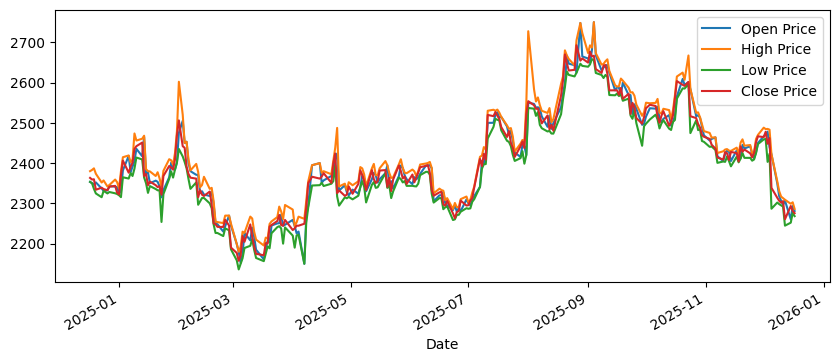

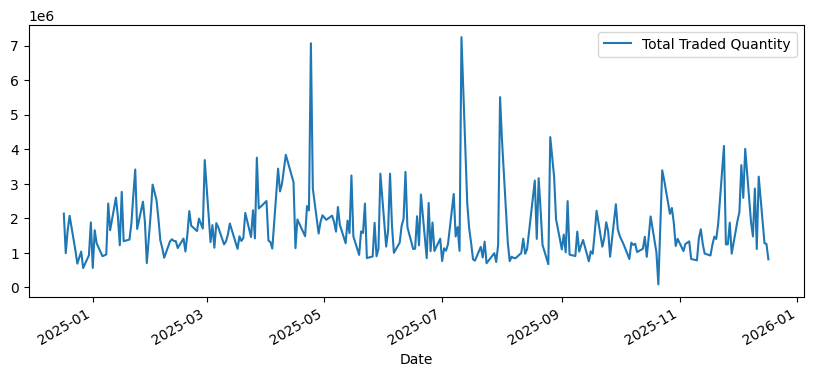

In [22]:
plot1=fs1[fs1['Symbol']=='HINDUNILVR']
plot1.plot(kind='line',
            x='Date',
           y=['Open Price','High Price','Low Price','Close Price'],
           figsize=(10,4)
          )
plot1.plot(kind='line',
           x='Date',
           y='Total Traded Quantity',
          figsize=(10,4)
          )


In [5]:
#Analysis
#The price movement appears relatively stable, showing a sideways trend without major day-to-day price shifts over the one-year period. The chart shows that the price occasionally moved up to around 2700 and down to around 2180, but these levels were short-lived and not sustained.

In [23]:
hul_1=fs1[fs1['Symbol']=='HINDUNILVR'].copy()

In [24]:
hul_1['Daily_Return']=hul_1['Close Price'].pct_change()
hul_1['Price_change']=hul_1['Close Price'].diff()
hul_1['SMA_20'] = hul_1['Close Price'].rolling(20).mean()
hul_1['SMA_50'] = hul_1['Close Price'].rolling(50).mean()
hul_1['Std']=hul_1['Daily_Return'].std()

In [25]:
hulp1=hul_1.iloc[0]['Close Price']# close on day1,
hulp2=hul_1.iloc[-1]['Close Price']# close on last day
delta_price=hulp2-hulp1
simple_return=delta_price/hulp1
cumulative_returns=(1+hul_1['Daily_Return']).cumprod()-1
days=(hul_1['Date'].iloc[-1]-hul_1['Date'].iloc[0]).days #the days at the end converts the whole operation into a devisible date format
year=days/365
lowest_price=hul_1['Close Price'].min()
highest_price=hul_1['Close Price'].max()
average_price=hul_1['Close Price'].mean()
CAGR=(hulp2/hulp1)**(1/year)-1 # CAGR (closep/openp)** (1/n) -1

In [26]:
hul_1

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Daily_Return,Price_change,SMA_20,SMA_50,Std
0,HINDUNILVR,2024-12-17,2353.35,2380.00,2353.35,2363.25,2131569,NaN,NaN,NaN,NaN,0.011664
1,HINDUNILVR,2024-12-18,2350.05,2383.00,2350.05,2359.20,988403,-0.001714,-4.05,NaN,NaN,0.011664
2,HINDUNILVR,2024-12-19,2347.00,2386.95,2336.00,2359.85,1655915,0.000276,0.65,NaN,NaN,0.011664
3,HINDUNILVR,2024-12-20,2352.10,2373.50,2324.65,2333.90,2069691,-0.010996,-25.95,NaN,NaN,0.011664
4,HINDUNILVR,2024-12-23,2337.00,2351.75,2315.25,2338.90,1066199,0.002142,5.00,NaN,NaN,0.011664
...,...,...,...,...,...,...,...,...,...,...,...,...
245,HINDUNILVR,2025-12-11,2296.30,2313.00,2292.00,2305.60,1108032,0.001694,3.90,2408.055,2464.036,0.011664
246,HINDUNILVR,2025-12-12,2306.90,2309.00,2244.70,2260.60,3203114,-0.019518,-45.00,2399.700,2458.960,0.011664
247,HINDUNILVR,2025-12-15,2260.60,2299.00,2252.00,2293.50,1274115,0.014554,32.90,2393.125,2454.106,0.011664
248,HINDUNILVR,2025-12-16,2293.40,2302.70,2276.00,2281.10,1256042,-0.005407,-12.40,2386.980,2448.830,0.011664


In [62]:
HUL_performance = pd.DataFrame({
    'Metric': [
        'Stock',
        'Start Price',
        'End Price',
        'Total Return',
        'Simple Return',
        'CAGR',
    ],
    'Value': [
        'HUL',
        hulp1,
        hulp2,
        delta_price,
        simple_return,
        CAGR,]
        
})

HUL_performance.round(2)


,Metric,Value
0,Stock,HUL
1,Start Price,2363.25
2,End Price,2275.6
3,Total Return,274.9
4,Simple Return,0.30379
5,CAGR,0.30379


In [29]:
# ITC Open/High/Low/Close and VOlume Chart

<Axes: xlabel='Date'>

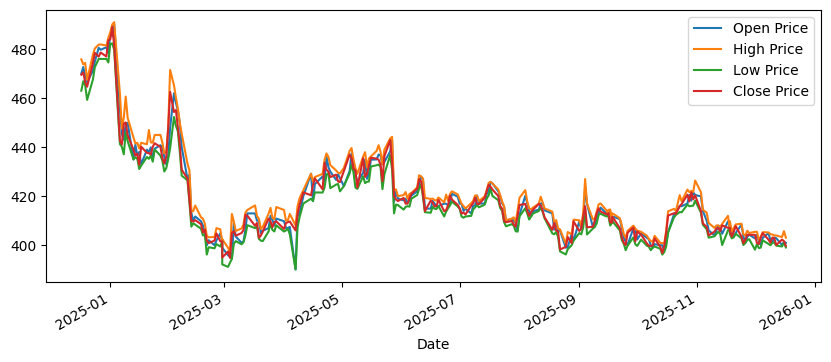

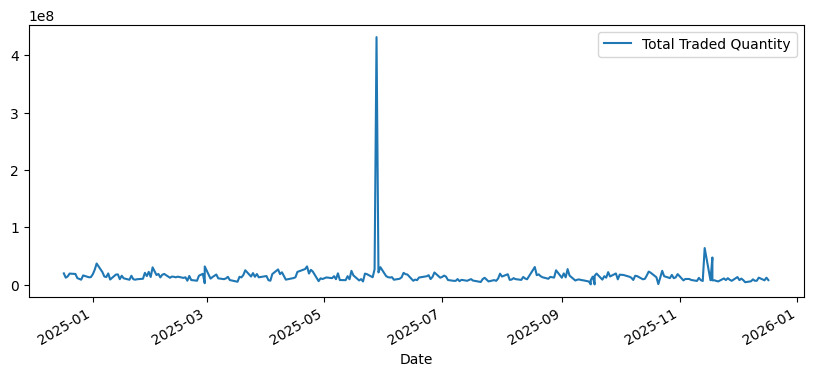

In [30]:
plot1=fs1[fs1['Symbol']=='ITC']
plot1.plot(kind='line',
            x='Date',
           y=['Open Price','High Price','Low Price','Close Price'],
           figsize=(10,4)
          )
plot1.plot(kind='line',
           x='Date',
           y='Total Traded Quantity',
          figsize=(10,4)
          )


In [6]:
#Analysis

#The price movement of ITC shows a clear downward trend over the given year. After reaching higher levels early in the period, the price declines sharply and then stabilizes within a lower range. For most of the year, prices fluctuate between approximately 400 and 420, indicating reduced volatility and a consolidation phase after the initial drop.

In [31]:
itc_1=fs1[fs1['Symbol']=='ITC'].copy()
itc_1['Daily_Return']=itc_1['Close Price'].pct_change()
itc_1['Price_change']=itc_1['Close Price'].diff()
itc_1['SMA_20'] = itc_1['Close Price'].rolling(20).mean()
itc_1['SMA_50'] = itc_1['Close Price'].rolling(50).mean()
itc_1['Std']=itc_1['Daily_Return'].std()


In [64]:
itcp1=itc_1.iloc[0]['Close Price']# close on day1,
itcp2=itc_1.iloc[-1]['Close Price']# close on last day
delta_price=itcp2-itcp1
simple_return=delta_price/itcp1
cumulative_returns=(1+itc_1['Daily_Return']).cumprod()-1
days=(itc_1['Date'].iloc[-1]-itc_1['Date'].iloc[0]).days #the days at the end converts the whole operation into a devisible date format
year=days/365
lowest_price=itc_1['Close Price'].min()
highest_price=itc_1['Close Price'].max()
average_price=itc_1['Close Price'].mean()
CAGR=(itcp2/itcp1)**(1/year)-1 # CAGR (closep/openp)** (1/n) -1

ITC_performance = pd.DataFrame({
    'Metric': [
        'Stock',
        'Start Price',
        'End Price',
        'Total Return',
        'Simple Return',
        'CAGR',
    ],
    'Value': [
        'ITC',
        hulp1,
        hulp2,
        delta_price,
        simple_return,
        CAGR,]
        
})

ITC_performance.round(2)


,Metric,Value
0,Stock,ITC
1,Start Price,2363.25
2,End Price,2275.6
3,Total Return,-69.75
4,Simple Return,-0.148546
5,CAGR,-0.148546


In [38]:
# Nestle India Open/High/Low/Close and VOlume Chart

<Axes: xlabel='Date'>

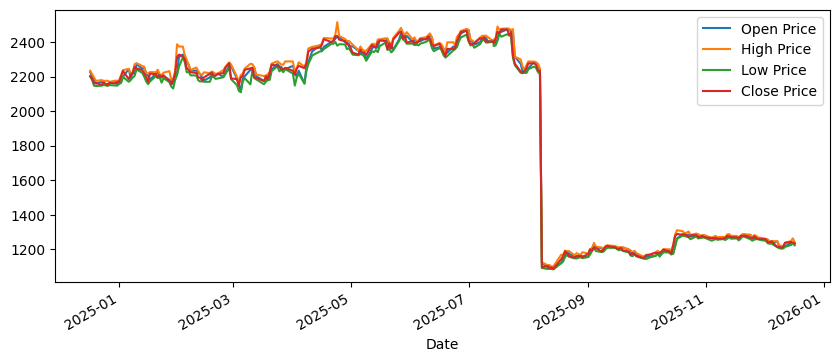

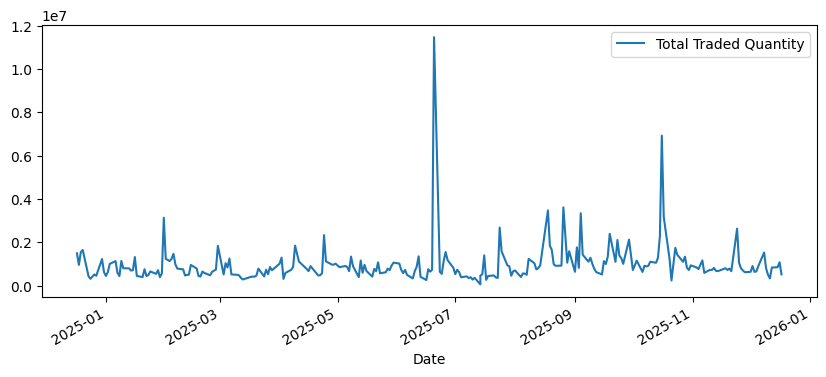

In [52]:
plot1=fs1[fs1['Symbol']=='NESTLEIND']
plot1.plot(kind='line',
            x='Date',
           y=['Open Price','High Price','Low Price','Close Price'],
           figsize=(10,4)
          )
plot1.plot(kind='line',
           x='Date',
           y='Total Traded Quantity',
          figsize=(10,4)
          )


In [8]:
#Analysis
#The stock traded steadily between ₹2,200–2,450 until mid-August 2025, then showed a sharp ~50% drop due to a 1:1 bonus issue (a technical price adjustment, not a real crash). After the adjustment, it stabilized around ₹1,100–1,300 with mild sideways to upward movement into early 2026.

In [54]:
nst_1=fs1[fs1['Symbol']=='NESTLEIND'].copy()
nst_1['Daily_Return']=nst_1['Close Price'].pct_change()
nst_1['Price_change']=nst_1['Close Price'].diff()
nst_1['SMA_20'] = nst_1['Close Price'].rolling(20).mean()
nst_1['SMA_50'] = nst_1['Close Price'].rolling(50).mean()
nst_1['Std']=nst_1['Daily_Return'].std()


In [63]:
nstp1=nst_1.iloc[0]['Close Price']# close on day1,
nstp2=nst_1.iloc[-1]['Close Price']# close on last day
delta_price=nstp2-nstp1
simple_return=delta_price/nstp1
cumulative_returns=(1+nst_1['Daily_Return']).cumprod()-1
days=(nst_1['Date'].iloc[-1]-itc_1['Date'].iloc[0]).days #the days at the end converts the whole operation into a devisible date format
year=days/365
lowest_price=nst_1['Close Price'].min()
highest_price=nst_1['Close Price'].max()
average_price=nst_1['Close Price'].mean()
CAGR=(nstp2/nstp1)**(1/year)-1 # CAGR (closep/openp)** (1/n) -1

NestleIndia_performance = pd.DataFrame({
    'Metric': [
        'Stock',
        'Start Price',
        'End Price',
        'Total Return',
        'Simple Return',
        'CAGR',
    ],
    'Value': [
        'Nestle India',
        hulp1,
        hulp2,
        delta_price,
        simple_return,
        CAGR,]
        
})

NestleIndia_performance.round(2)


,Metric,Value
0,Stock,Nestle India
1,Start Price,2363.25
2,End Price,2275.6
3,Total Return,-968.35
4,Simple Return,-0.43957
5,CAGR,-0.43957


In [56]:
# Tata Consumer Products India Open/High/Low/Close and VOlume Chart


<Axes: xlabel='Date'>

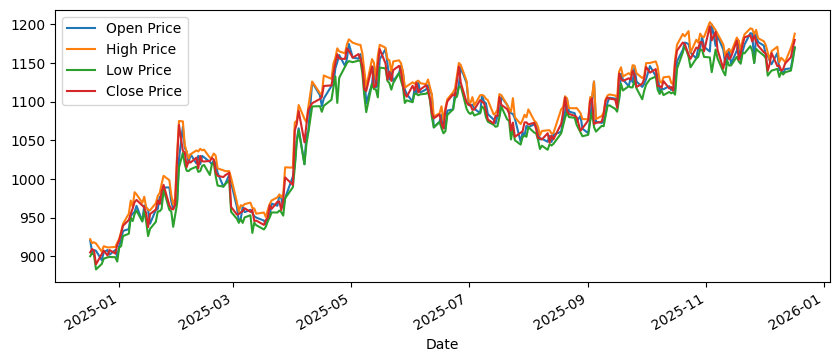

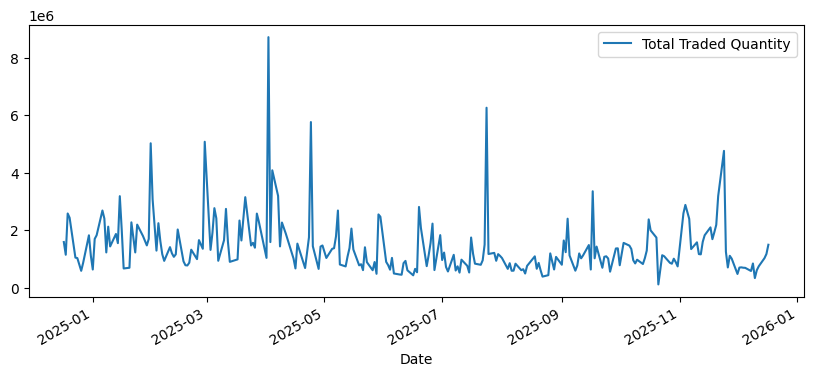

In [41]:
plot1=fs1[fs1['Symbol']=='TATACONSUM']
plot1.plot(kind='line',
            x='Date',
           y=['Open Price','High Price','Low Price','Close Price'],
           figsize=(10,4)
          )
plot1.plot(kind='line',
           x='Date',
           y='Total Traded Quantity',
          figsize=(10,4)
          )


In [10]:
#Analysis
#The stock showed a strong upward trend in 2025, starting around ₹900–950. After early volatility in March–April, it recovered steadily, accelerating in the second half to reach ₹1,100–1,200 by late 2025 and stabilizing around ₹1,170–1,180 in early January 2026.


In [57]:
ttc_1=fs1[fs1['Symbol']=='TATACONSUM'].copy()
ttc_1['Daily_Return']=ttc_1['Close Price'].pct_change()
ttc_1['Price_change']=ttc_1['Close Price'].diff()
ttc_1['SMA_20'] = ttc_1['Close Price'].rolling(20).mean()
ttc_1['SMA_50'] = ttc_1['Close Price'].rolling(50).mean()
ttc_1['Std']=ttc_1['Daily_Return'].std()


In [65]:
ttcp1=ttc_1.iloc[0]['Close Price']# close on day1,
ttcp2=ttc_1.iloc[-1]['Close Price']# close on last day
delta_price=ttcp2-ttcp1
simple_return=delta_price/ttcp1
cumulative_returns=(1+ttc_1['Daily_Return']).cumprod()-1
days=(ttc_1['Date'].iloc[-1]-ttc_1['Date'].iloc[0]).days #the days at the end converts the whole operation into a devisible date format
year=days/365
lowest_price=ttc_1['Close Price'].min()
highest_price=ttc_1['Close Price'].max()
average_price=ttc_1['Close Price'].mean()
CAGR=(ttcp2/ttcp1)**(1/year)-1 # CAGR (closep/openp)** (1/n) -1

Tatacounsuemer_performance = pd.DataFrame({
    'Metric': [
        'Stock',
        'Start Price',
        'End Price',
        'Total Return',
        'Simple Return',
        'CAGR',
    ],
    'Value': [
        'TataConsumer',
        hulp1,
        hulp2,
        delta_price,
        simple_return,
        CAGR,]
        
})

Tatacounsuemer_performance.round(2)


,Metric,Value
0,Stock,TataConsumer
1,Start Price,2363.25
2,End Price,2275.6
3,Total Return,274.9
4,Simple Return,0.30379
5,CAGR,0.30379


In [42]:
# Daily Returns , SMA and Volatitliy

In [43]:
hul_1

,Symbol,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,Daily_Return,Price_change,SMA_20,SMA_50,Std
0,HINDUNILVR,2024-12-17,2353.35,2380.00,2353.35,2363.25,2131569,NaN,NaN,NaN,NaN,0.011664
1,HINDUNILVR,2024-12-18,2350.05,2383.00,2350.05,2359.20,988403,-0.001714,-4.05,NaN,NaN,0.011664
2,HINDUNILVR,2024-12-19,2347.00,2386.95,2336.00,2359.85,1655915,0.000276,0.65,NaN,NaN,0.011664
3,HINDUNILVR,2024-12-20,2352.10,2373.50,2324.65,2333.90,2069691,-0.010996,-25.95,NaN,NaN,0.011664
4,HINDUNILVR,2024-12-23,2337.00,2351.75,2315.25,2338.90,1066199,0.002142,5.00,NaN,NaN,0.011664
...,...,...,...,...,...,...,...,...,...,...,...,...
245,HINDUNILVR,2025-12-11,2296.30,2313.00,2292.00,2305.60,1108032,0.001694,3.90,2408.055,2464.036,0.011664
246,HINDUNILVR,2025-12-12,2306.90,2309.00,2244.70,2260.60,3203114,-0.019518,-45.00,2399.700,2458.960,0.011664
247,HINDUNILVR,2025-12-15,2260.60,2299.00,2252.00,2293.50,1274115,0.014554,32.90,2393.125,2454.106,0.011664
248,HINDUNILVR,2025-12-16,2293.40,2302.70,2276.00,2281.10,1256042,-0.005407,-12.40,2386.980,2448.830,0.011664


In [45]:
# Portfolio stock Max price in a year
fs1.groupby('Symbol')['Close Price'].max()


Symbol
HINDUNILVR    2692.60
ITC            489.05
NESTLEIND     2472.60
TATACONSUM    1197.50
Name: Close Price, dtype: float64

In [46]:
# Portfolio stocks Min price in a year
fs1.groupby('Symbol')['Close Price'].min()

Symbol
HINDUNILVR    2157.35
ITC            394.85
NESTLEIND     1089.40
TATACONSUM     889.45
Name: Close Price, dtype: float64

In [47]:
# Portfolio stocks Mean and Median price in a year

In [48]:
#Mean-
fs1.groupby('Symbol')['Close Price'].mean().round(2)


Symbol
HINDUNILVR    2404.80
ITC            419.01
NESTLEIND     1916.44
TATACONSUM    1075.52
Name: Close Price, dtype: float64

In [49]:
#Median
fs1.groupby('Symbol')['Close Price'].median().round(2)

Symbol
HINDUNILVR    2383.32
ITC            413.82
NESTLEIND     2207.80
TATACONSUM    1093.85
Name: Close Price, dtype: float64